# Uber Rides Data Analysis Using Python

This project, **"Uber Rides Data Analysis Using Python,"** aims to explore and analyze data related to Uber rides to uncover insights into user behavior, ride categories, and purposes. By utilizing Python and its powerful libraries, we will conduct an in-depth analysis to better understand patterns in the data.

## Objectives
- Analyze ride categories and purposes to identify trends and insights.
- Visualize the data to make the findings clear and interpretable.
- Compare different ride categories and their purposes using visualizations.

The analysis will be performed using Pandas for data manipulation, NumPy for efficient numerical computations, and Matplotlib/Seaborn for creating visualizations of ride categories and user purposes. This approach will help identify trends and provide meaningful insights through data-driven visuals.

### Importing necessary libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Importing Dataset

In [5]:
df = pd.read_csv("UberDataset.csv")
df.head()           

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Finding the Shape of the Dataset


In [7]:
df.shape

(1156, 7)

### Exploring Data: Null Values and Data Types


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

### Data Preprocessing

In [10]:
df['PURPOSE'].fillna("NOT", inplace=True)

In [11]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


### Splitting START_DATE and Categorizing Time of Day


In [13]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

df['day-night'] = pd.cut(x=df['time'], bins=[0,10,15,19,24], labels= ['Morning', 'Afternoon', 'Evening', 'Night'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   date        421 non-null    object        
 8   time        421 non-null    float64       
 9   day-night   414 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [15]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


### Dropping Rows with Null Values and Duplicates


In [16]:
df.dropna(inplace=True)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


In [19]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
date          0
time          0
day-night     0
dtype: int64

### Data Visualization
In this section, we will try to understand and compare all columns.

In [21]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Now, we will be using matplotlib and seaborn library for countplot the *CATEGORY* and *PURPOSE* columns.

<Axes: xlabel='count', ylabel='PURPOSE'>

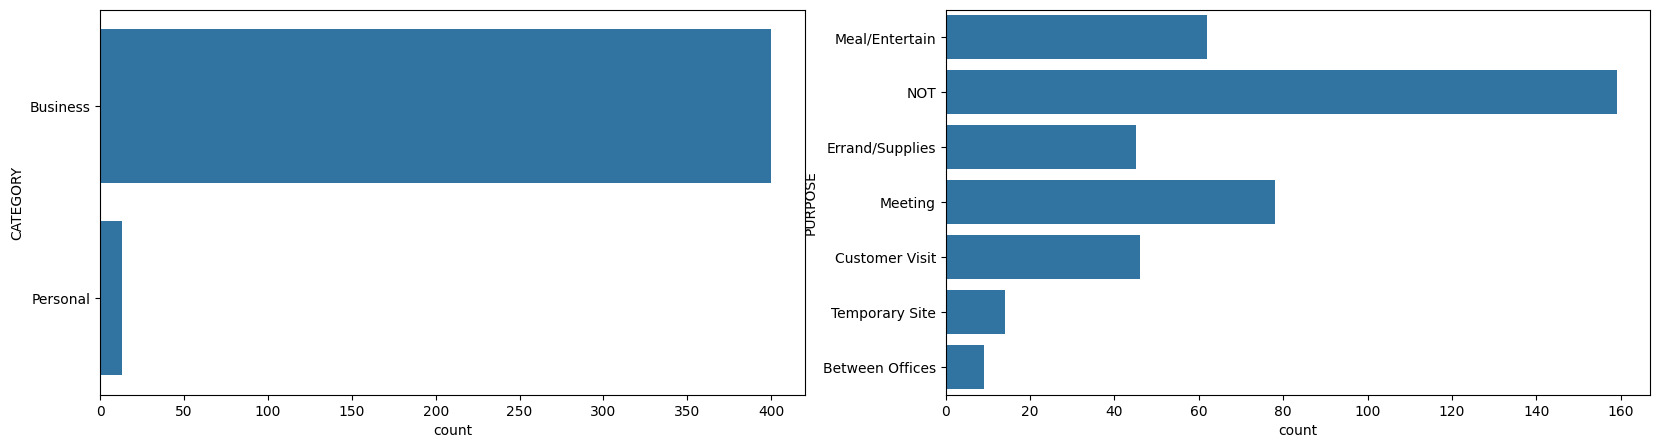

In [35]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])


<Axes: xlabel='count', ylabel='day-night'>

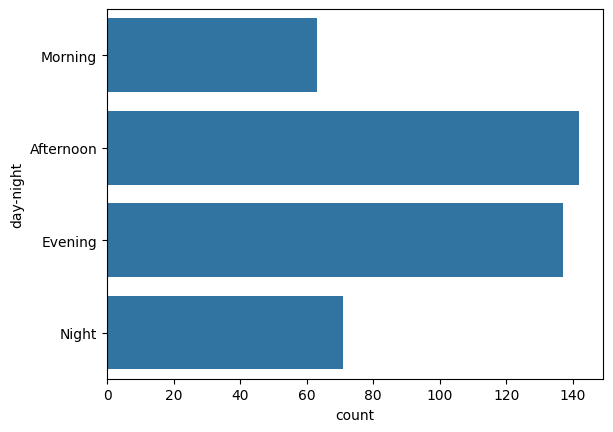

In [34]:
sns.countplot(df['day-night'])

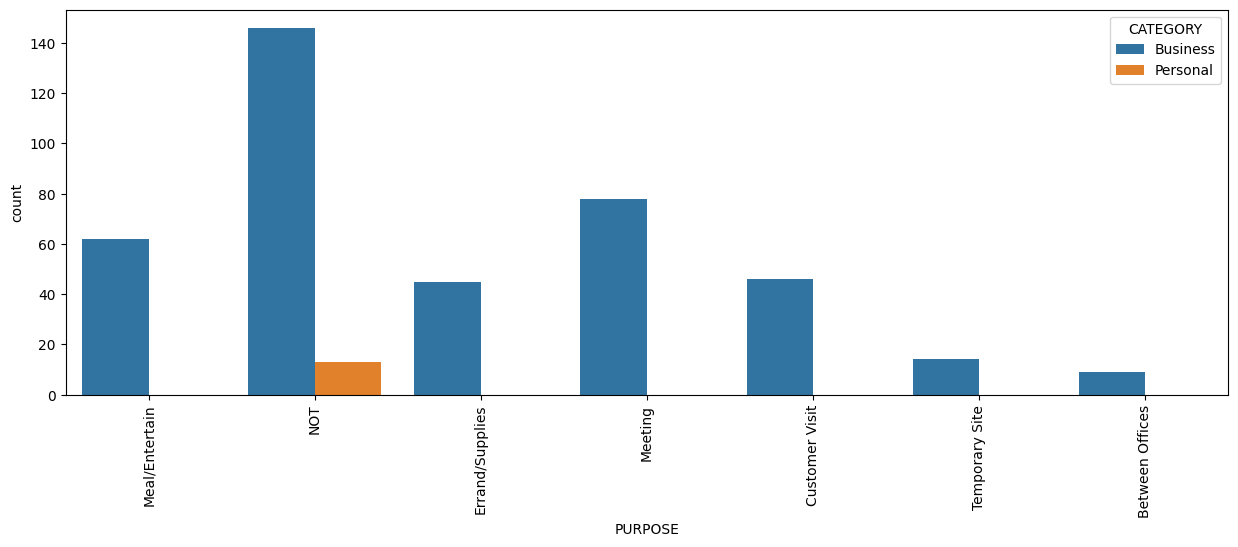

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

## Insights from the Count Plots

- The majority of rides are booked for **business purposes**.
- A significant number of people book cabs for **Meetings** and **Meal/Entertainment purposes**.
- Most cab bookings occur during the **10 AM to 5 PM (Afternoon)** time period.


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

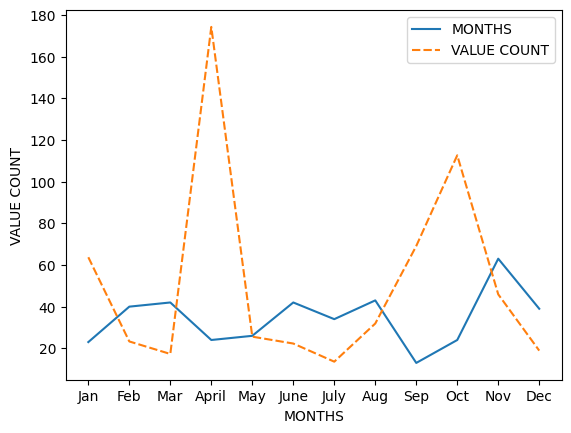

In [47]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["MONTH"] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": df.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

## Insights from the Plot

- The counts are highly irregular across the months.
- However, it is evident that the counts drop significantly during **November, December, and January**, which aligns with the winter season in Florida, USA.


Visualization for days data.

In [52]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

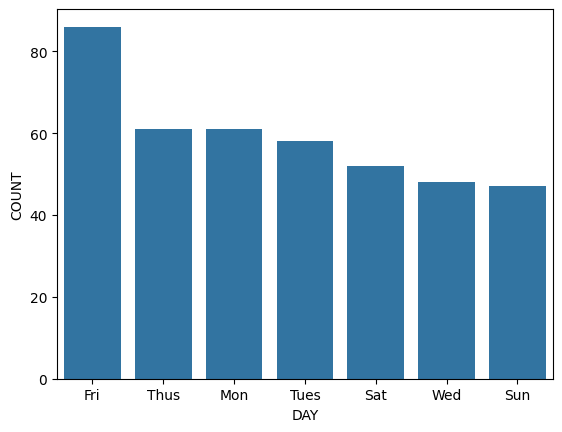

In [53]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

let’s explore the MILES Column 

<Axes: ylabel='MILES'>

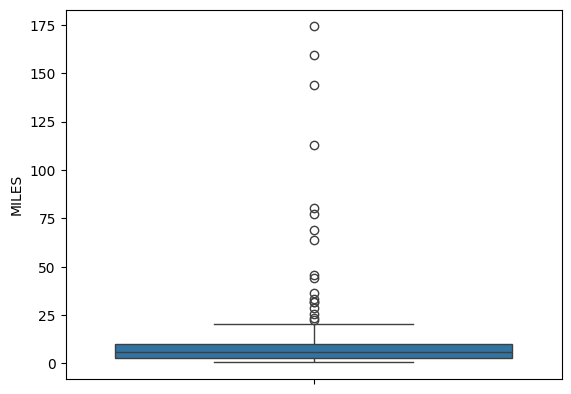

In [54]:
sns.boxplot(dataset['MILES'])

As the graph is not clearly understandable. Let’s zoom in it for values lees than 100.

C:\Users\rushi\AppData\Local\Temp\ipykernel_912\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

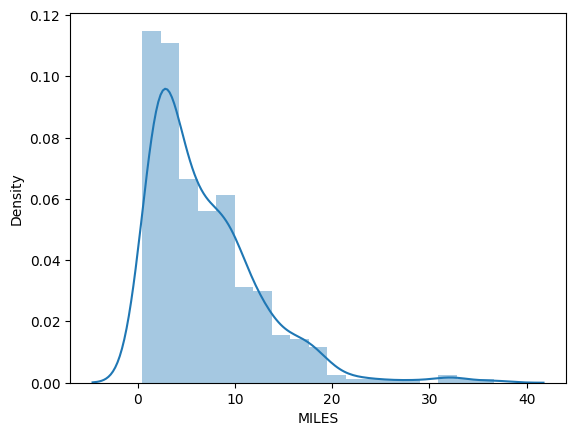

In [56]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

## Insights from the Plots

- Most cabs are booked for distances of **4-5 miles**.
- The majority of people choose cabs for distances within **0-20 miles**.
- For distances greater than **20 miles**, the number of cab bookings is nearly negligible.


# Conclusion and Recommendations

This project provided valuable insights into user behavior and preferences regarding Uber rides. From the analysis, we observed the following trends:
- A significant portion of rides is booked for business purposes.
- Cab bookings for meetings and entertainment purposes are highly popular.
- Most cab bookings occur during the afternoon, aligning with user activity patterns.
- The majority of rides are for short to medium distances (0-20 miles), with 4-5 miles being the most common. Long-distance rides (over 20 miles) are negligible.

### Recommendations
1. **Optimize Afternoon Services**:
   - Deploy more cabs during the afternoon peak hours (10 AM to 5 PM) to match the high demand.
   
2. **Focus on Short-Distance Rides**:
   - Enhance pricing and availability for short to medium-distance rides, as they constitute the majority of bookings.
   
3. **Improve Business-Oriented Services**:
   - Introduce subscription plans or loyalty programs for frequent business travelers to increase customer retention.

4. **Targeted Marketing for Meetings and Entertainment**:
   - Create promotional campaigns tailored to users who book rides for meetings or entertainment purposes.

5. **Winter Season Adjustments**:
   - In regions like Florida, consider dynamic pricing or promotions during the winter months to address reduced demand.

By implementing these recommendations, Uber can better align their offerings with user preferences, optimi
